# Track Machine Learning experiments and models

A machine learning model is a file that has been trained to recognize certain types of patterns. You train a model over a set of data, providing it an algorithm that it can use to reason over and learn from those data. Once you have trained the model, you can use it to reason over data that it hasn't seen before, and make predictions about that data.

In this notebook, you will learn the basic steps to run an experiment, add a model version to track run metrics and parameters and register a model.


In [ ]:
display(df)

In [57]:
import pandas as pd
# Paso 1: Cargar el archivo CSV desde una URL en un DataFrame de Pandas 
# Ruta del archivo CSV
ruta_archivo = 'https://raw.githubusercontent.com/armandoordonez/eda_couse/main/data/prediccion_prestamo_train.csv'  # Reemplaza con la ruta de tu archivo CSV

# Cargar el archivo CSV en un DataFrame de Pandas 
#data = pd.read_csv(ruta_archivo)
dataFabric = spark.sql("SELECT * FROM lago1.prediccion_prestamo LIMIT 1000")


data= dataFabric.toPandas() 

StatementMeta(, 397bc87e-7d5c-42c9-b9e1-603598e4d2ea, 58, Finished, Available, Finished)

In [58]:
# Paso 2: Análisis Exploratorio de datos simplificado

# Puedes imprimir información básica sobre el conjunto de datos


print("Información del conjunto de datos:")
print(data.info())

StatementMeta(, 397bc87e-7d5c-42c9-b9e1-603598e4d2ea, 59, Finished, Available, Finished)

Información del conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int32  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int32(1), object(8)
memory usage: 60.1+ KB
None


In [59]:
# Visualizar las primeras filas del conjunto de datos

print("\nPrimeras filas del conjunto de datos:")
data.head(5)

StatementMeta(, 397bc87e-7d5c-42c9-b9e1-603598e4d2ea, 60, Finished, Available, Finished)


Primeras filas del conjunto de datos:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
1,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
2,LP001028,Male,Yes,2,Graduate,No,3073,8106.0,200.0,360.0,1.0,Urban,Y
3,LP001046,Male,Yes,1,Graduate,No,5955,5625.0,315.0,360.0,1.0,Urban,Y
4,LP001068,Male,Yes,0,Graduate,No,2799,2253.0,122.0,360.0,1.0,Semiurban,Y


In [60]:
# Mostrar estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(data.describe())
# 

StatementMeta(, 397bc87e-7d5c-42c9-b9e1-603598e4d2ea, 61, Finished, Available, Finished)


Estadísticas descriptivas:
       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


In [61]:
# Paso 3: Preprocesamiento de datos
 
# Algo de limpieza de datos
# eliminamos los nulos
data = data.dropna()

StatementMeta(, 397bc87e-7d5c-42c9-b9e1-603598e4d2ea, 62, Finished, Available, Finished)

In [62]:
# mostramos nuevemamente la información general del dataset 
# para verificar que no hayan nulos

print(data.info())

StatementMeta(, 397bc87e-7d5c-42c9-b9e1-603598e4d2ea, 63, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 0 to 612
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            480 non-null    object 
 1   Gender             480 non-null    object 
 2   Married            480 non-null    object 
 3   Dependents         480 non-null    object 
 4   Education          480 non-null    object 
 5   Self_Employed      480 non-null    object 
 6   ApplicantIncome    480 non-null    int32  
 7   CoapplicantIncome  480 non-null    float64
 8   LoanAmount         480 non-null    float64
 9   Loan_Amount_Term   480 non-null    float64
 10  Credit_History     480 non-null    float64
 11  Property_Area      480 non-null    object 
 12  Loan_Status        480 non-null    object 
dtypes: float64(4), int32(1), object(8)
memory usage: 50.6+ KB
None


In [63]:
# Paso 3: Dividir el conjunto de datos en características (X) y etiquetas (y)
# Características
# Seleccionamos las columnas de características
# ingresos_solicitante, ingresos_cosolicitante y monto_prestamo como características para el modelo
# y la columna estado_prestamo como etiqueta para predecir

X = data[["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]]
y = data['Loan_Status']

StatementMeta(, 397bc87e-7d5c-42c9-b9e1-603598e4d2ea, 64, Finished, Available, Finished)

In [64]:
# mostramos la información de las características   
print(X.info())

StatementMeta(, 397bc87e-7d5c-42c9-b9e1-603598e4d2ea, 65, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 0 to 612
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    480 non-null    int32  
 1   CoapplicantIncome  480 non-null    float64
 2   LoanAmount         480 non-null    float64
dtypes: float64(2), int32(1)
memory usage: 13.1 KB
None


In [66]:
# aqui se muestra la información de las etiquetas
# que en este caso es la columna 'estado_prestamo'  es la que queremos predecir
# en este caso es una variable binaria:  1 si el prestamo fue aprobado y 0 si no fue aprobado

print(y.value_counts())

data['Loan_Status'] = data['Loan_Status'].replace({"Y": 1, "N": 0})
data['Loan_Status'] = data['Loan_Status'].astype(int)

StatementMeta(, 397bc87e-7d5c-42c9-b9e1-603598e4d2ea, 67, Finished, Available, Finished)

Loan_Status
Y    332
N    148
Name: count, dtype: int64


In [67]:
# Importamos las bibliotecas necesarias

# bibliotecas para manipulación de datos
import pandas as pd

# bibliotecas para preprocesamiento
from sklearn.model_selection import train_test_split
# bibliotecas para modelado
from sklearn.ensemble import RandomForestClassifier

# bibliotecas para evaluación
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# bibliotecas para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Paso 4: Dividir el conjunto de datos en entrenamiento y prueba

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

StatementMeta(, 397bc87e-7d5c-42c9-b9e1-603598e4d2ea, 68, Finished, Available, Finished)

In [68]:
# Paso 4: Entrenar un modelo de clasificación (usando Random Forest como ejemplo)
# Crear un modelo de clasificación de bosque aleatorio
modelo = RandomForestClassifier(random_state=42)
modelo.fit(X_train, y_train)



StatementMeta(, 397bc87e-7d5c-42c9-b9e1-603598e4d2ea, 69, Finished, Available, Finished)

2024-08-05:20:44:38,842 WARNING  [tracking_store.py:153] log_inputs not supported


RandomForestClassifier(random_state=42)

StatementMeta(, 397bc87e-7d5c-42c9-b9e1-603598e4d2ea, 70, Finished, Available, Finished)

2024-08-05:20:44:50,42 WARNING  [tracking_store.py:153] log_inputs not supported



Precisión del modelo: 0.61


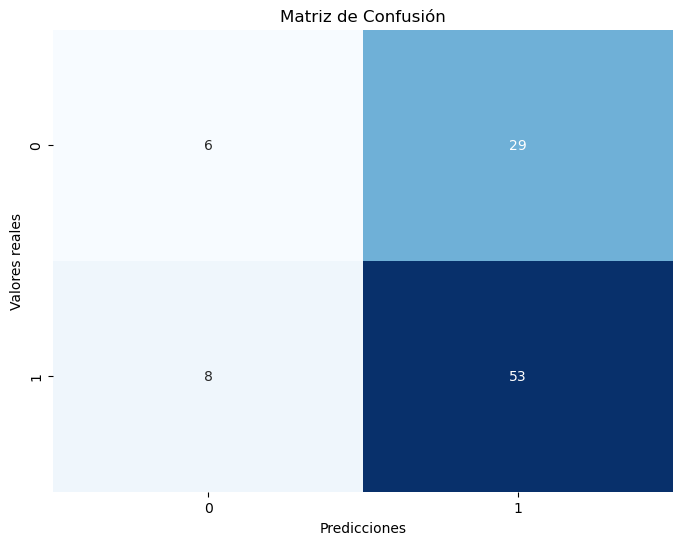


Informe de Clasificación:
              precision    recall  f1-score   support

           N       0.43      0.17      0.24        35
           Y       0.65      0.87      0.74        61

    accuracy                           0.61        96
   macro avg       0.54      0.52      0.49        96
weighted avg       0.57      0.61      0.56        96



In [69]:
# Paso 5: Evaluación del modelo
y_pred = modelo.predict(X_test)

# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print(f"\nPrecisión del modelo: {precision:.2f}")

# Mostrar la matriz de confusión
matriz_confusion = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar el informe de clasificación
informe_clasificacion = classification_report(y_test, y_pred)
print("\nInforme de Clasificación:")
print(informe_clasificacion)